Importing Required Libraries, Classes and Functions

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR,OneCycleLR
from tqdm import tqdm
import torch.nn as nn
import numpy as  np

In [ ]:
!pip install torchsummary
from torchsummary import summary

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

     |████████████████████████████████| 102 kB 5.4 MB/s 
     |████████████████████████████████| 47.6 MB 65 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


Pull in the code library from repo

In [ ]:
!git clone https://github.com/sherry-ml/deep_dream_code.git

Cloning into 'deep_dream_code'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 128 (delta 60), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (128/128), 33.40 KiB | 1006.00 KiB/s, done.
Resolving deltas: 100% (60/60), done.


Import Custom Functions, Classes

In [ ]:
from deep_dream_code.models import resnet, resnet_orig
from deep_dream_code.models.resnet import ResNet18
from deep_dream_code.models.resnet_orig import ResNet18_orig

In [ ]:
from deep_dream_code import main, utils

In [ ]:
from deep_dream_code.main import train, test, train_test_model

In [ ]:
from deep_dream_code.utils import default_DL, C_10_DS, set_compose_params, tl_ts_mod, generate_gradcam, plot_gradcam
from deep_dream_code.utils import show_sample_img, torch_device, view_model_summary,display_incorrect_images,show_plots

Load Default dataset without any transformation(except tensor transformation)

In [ ]:
trl, trs = default_DL()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Show sample images from default dataset

 bird  deer truck truck


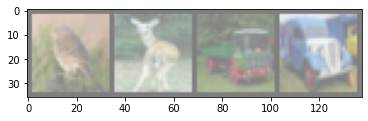

In [ ]:
show_sample_img(trl, classes,10)

Calculate mean and std deviation of different channels from default dataset

In [ ]:
mean = list(np.round(trs.data.mean(axis=(0,1,2))/255, 4))
mean

[0.4914, 0.4822, 0.4465]

In [ ]:
std = list(np.round(trs.data.std(axis=(0,1,2))/255,4))
std

[0.247, 0.2435, 0.2616]

Setting transformation parameters and applying to CIFAR10 dataset

In [ ]:
transform_train, transform_valid = set_compose_params(mean, std)

In [ ]:
trainset_mod, trainloader_mod, testset_mod, testloader_mod = tl_ts_mod(transform_train,transform_valid)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(testset_mod), len(trainset_mod)


(10000, 50000)

Show sample images from CIFAR10 dataset with transformation applied

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane plane  ship horse  frog


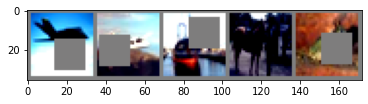

In [ ]:
show_sample_img(trainloader_mod, classes,5)  

In [ ]:
features, labels = next(iter(trainloader_mod))
features.shape, labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

In [ ]:
device = torch_device(torch.cuda.is_available())
print(f'From main notebook device:  {device}')

cuda
From main notebook device:  cuda


Printing Model Summary

In [ ]:
test_model = ResNet18()

In [ ]:
view_model_summary(test_model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         Dropout2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
             ReLU-11           [-1, 64, 32, 32]               0
        Dropout2d-12           [-1, 64, 32, 32]               0
       BasicBlock-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

Creating resnet model and running train and test loop

In [ ]:
model = ResNet18(0.05)

In [ ]:
train_losses = []
test_losses  = []
wrong_prediction_list = []
net, train_losses,test_losses,wrong_prediction_list = train_test_model(model,trainloader_mod, testloader_mod, 'BN', 20, 0.001 ,0.002, device)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout2d(p=0.05, inplace=False)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Dropout2d(p=0.05, inplace=False)
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Dropout2d(p=0.05, inplace=False)
      )
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Sequenti

100%|██████████| 391/391 [00:40<00:00,  9.71it/s]


 Average Training Loss=2.7207670318603516, Accuracy=37.852



Test set: Average loss: 1.4356, Accuracy: 4750/10000 (47.50%)

EPOCH: 1


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=2.1651723767089845, Accuracy=50.362



Test set: Average loss: 1.1915, Accuracy: 5680/10000 (56.80%)

EPOCH: 2


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.942858448791504, Accuracy=57.726



Test set: Average loss: 1.1589, Accuracy: 5642/10000 (56.42%)

EPOCH: 3


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.8094747311401367, Accuracy=62.136



Test set: Average loss: 0.9819, Accuracy: 6560/10000 (65.60%)

EPOCH: 4


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.64570010345459, Accuracy=65.982



Test set: Average loss: 0.9291, Accuracy: 6851/10000 (68.51%)

EPOCH: 5


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.5457135903930663, Accuracy=69.016



Test set: Average loss: 0.7910, Accuracy: 7251/10000 (72.51%)

EPOCH: 6


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]



 Average Training Loss=1.4581334799194337, Accuracy=71.098

Test set: Average loss: 0.7515, Accuracy: 7384/10000 (73.84%)

EPOCH: 7


100%|██████████| 391/391 [00:40<00:00,  9.72it/s]


 Average Training Loss=1.3713456866455078, Accuracy=72.936



Test set: Average loss: 0.6418, Accuracy: 7784/10000 (77.84%)

EPOCH: 8


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.3291181005859376, Accuracy=74.45



Test set: Average loss: 0.6031, Accuracy: 7917/10000 (79.17%)

EPOCH: 9


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.2845059045410157, Accuracy=75.728



Test set: Average loss: 0.6578, Accuracy: 7861/10000 (78.61%)

EPOCH: 10


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


 Average Training Loss=1.26688768951416, Accuracy=76.55



Test set: Average loss: 0.5664, Accuracy: 8083/10000 (80.83%)

EPOCH: 11


100%|██████████| 391/391 [00:40<00:00,  9.72it/s]


 Average Training Loss=1.2277562106323243, Accuracy=77.608



Test set: Average loss: 0.5898, Accuracy: 7973/10000 (79.73%)

EPOCH: 12


100%|██████████| 391/391 [00:40<00:00,  9.74it/s]


 Average Training Loss=1.2013332922363282, Accuracy=78.384



Test set: Average loss: 0.5001, Accuracy: 8264/10000 (82.64%)

EPOCH: 13


100%|██████████| 391/391 [00:40<00:00,  9.74it/s]


 Average Training Loss=1.1911599057006836, Accuracy=78.766



Test set: Average loss: 0.5576, Accuracy: 8120/10000 (81.20%)

EPOCH: 14


100%|██████████| 391/391 [00:40<00:00,  9.73it/s]



 Average Training Loss=1.1626917608642577, Accuracy=79.882

Test set: Average loss: 0.5610, Accuracy: 8098/10000 (80.98%)

EPOCH: 15


100%|██████████| 391/391 [00:40<00:00,  9.74it/s]


 Average Training Loss=1.1503873683166503, Accuracy=80.478



Test set: Average loss: 0.4907, Accuracy: 8331/10000 (83.31%)

EPOCH: 16


100%|██████████| 391/391 [00:40<00:00,  9.75it/s]


 Average Training Loss=1.1368040315246581, Accuracy=80.792



Test set: Average loss: 0.5010, Accuracy: 8352/10000 (83.52%)

EPOCH: 17


100%|██████████| 391/391 [00:40<00:00,  9.74it/s]


 Average Training Loss=1.12510998336792, Accuracy=81.344



Test set: Average loss: 0.4742, Accuracy: 8384/10000 (83.84%)

EPOCH: 18


100%|██████████| 391/391 [00:40<00:00,  9.74it/s]


 Average Training Loss=1.1124818344116212, Accuracy=81.748



Test set: Average loss: 0.5046, Accuracy: 8305/10000 (83.05%)

EPOCH: 19


100%|██████████| 391/391 [00:40<00:00,  9.74it/s]


 Average Training Loss=1.1102736251831056, Accuracy=81.892



Test set: Average loss: 0.5115, Accuracy: 8304/10000 (83.04%)

Total Number of incorrectly predicted images by model type BN is 1696


Displaying Incorrect images with their predicted and actual labels

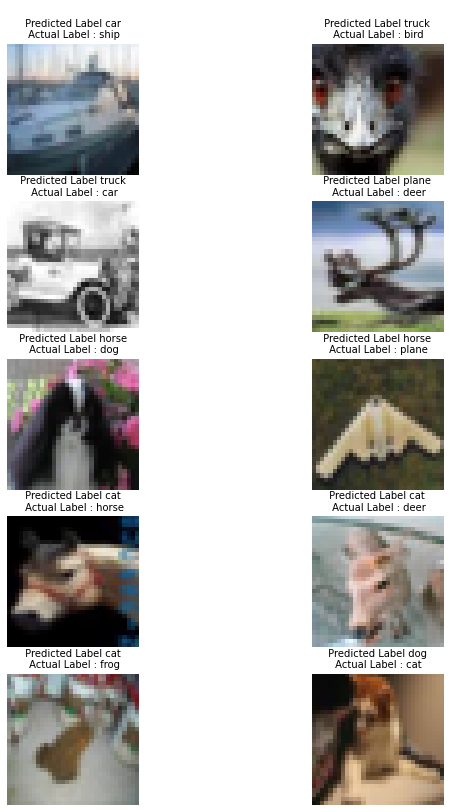

In [ ]:
display_incorrect_images(wrong_prediction_list, std,  mean,classes)

Showing plots for train and test losses

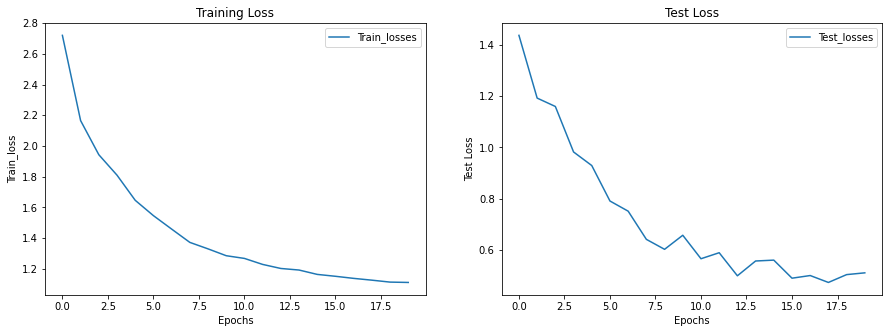

In [ ]:
show_plots(train_losses, test_losses)

Showing gradcam output from 10 misclassified images

In [ ]:
target_layers = ["layer1", "layer2","layer3", "layer4"]

In [ ]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
gradcam_output, probs, predicted_classes = generate_gradcam(wrong_prediction_list[:10], net, target_layers, device)

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


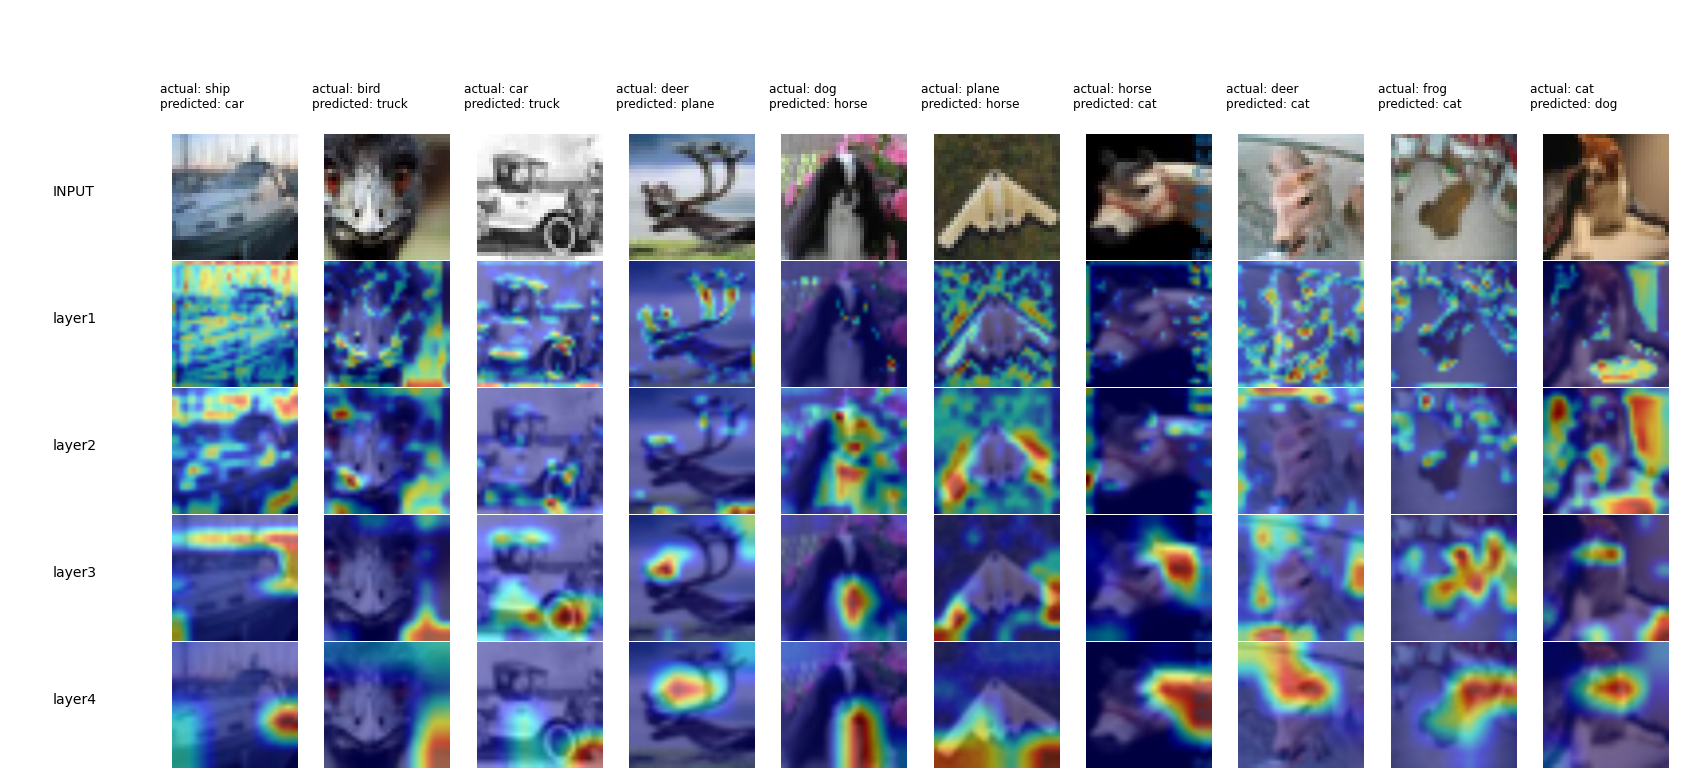

In [ ]:
plot_gradcam(gradcam_output, target_layers, classes, (3,32,32), predicted_classes, wrong_prediction_list[:10], mean, std)